# Comparaison Inforsid, RCIS et Percom

On va essayer de comparer les mots les plus fréquents de ces trois conférences. 
Inforsid et RCIS partagent le même domaine majeur, celui des Systèmes d'Information, avec plusieurs auteurs qui participent aux deux événements. Percom, en revanche, se positione dans un autre domaine, celui de l'Informatique Pervasive, qui est un domaine traditionnellement bien plus "technologique".  

In [86]:
import pandas as pnd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline



In [87]:
def create_wc (seuil, dico, description) :
    wc = WordCloud(width=1600, height=800, max_words=len(dico), 
               background_color="white").generate_from_frequencies(dico)
    plt.figure(figsize=(18,10))
    plt.title('les {} {}'.format(seuil, description))
    plt.axis('off')
    plt.imshow(wc)

In [88]:
output_dir = './output_inforsid_50'

inforsid_file_words_csv = './output_inforsid_50/Inforsidwordcount.csv'
inforsid_file_ngrams_csv = './output_inforsid_50/Inforsidngramcount.csv'

rcis_file_words_csv = './output_RCIS_50/RCISwordcount.csv'
rcis_file_ngrams_csv = './output_RCIS_50/RCISngramcount.csv'

percom_file_words_csv = './output_percom_50/percomwordcount.csv'
percom_file_ngrams_csv = './output_percom_50/percomngramcount.csv'

seuil_visu = 15

## Lecture des mots les plus fréquents 

### Inforsid

on va lire des fichiers, analyse descriptive et top/flop 15 (seuil de visualisation). 

In [89]:
inforsid_wordcount = pnd.read_csv(inforsid_file_words_csv, delimiter=';', header=[0])

print ('Nbr de mots :', len(inforsid_wordcount['word'].unique()))
inforsid_wordcount.describe()

Nbr de mots : 183


,count,year
count,500.000000,500.000000
mean,133.392000,2018.500000
std,85.784266,2.875158
min,53.000000,2014.000000
25%,83.000000,2016.000000
50%,112.000000,2018.500000
75%,147.000000,2021.000000
max,747.000000,2023.000000


In [90]:
inforsid_motsplusfreq = inforsid_wordcount[['word','count']].groupby(by=['word']).sum().sort_values(by=['count'], ascending=False)
inforsid_motsplusfreq.head(seuil_visu)

,count
word,
donnée,4197
information,3226
modèle,2783
système,2316
utilisateur,2166
processus,2038
méthode,1277
application,1266
cas,1218


In [91]:
inforsid_motsplusfreq.tail(seuil_visu)

,count
word,
design,71
propagation,70
explanation,69
graph,65
utilisation,64
alimentaire,63
produit,63
scénario,63
pratique,63


### RCIS

même chose pour RCIS

In [92]:
rcis_wordcount = pnd.read_csv(rcis_file_words_csv, delimiter=';', header=[0])

print ('Nbr de mots :', len(rcis_wordcount['word'].unique()))
rcis_wordcount.describe()

Nbr de mots : 123


,count,year
count,450.000000,450.000000
mean,414.677778,2018.000000
std,260.071895,2.584863
min,178.000000,2014.000000
25%,254.250000,2016.000000
50%,340.500000,2018.000000
75%,463.500000,2020.000000
max,1844.000000,2022.000000


Nous avons 9 éditions de proceedings de RCIS (pas de 2023). 
Le nombre de citations par mot y est bien plus élevé que sur Inforsid (une moyenne de 416 contre 133 pour Inforsid), ce qui est une conséquence de la taille de la conférence, avec un nombre plus important d'articles. 

In [93]:
rcis_motsplusfreq = rcis_wordcount[['word','count']].groupby(by=['word']).sum().sort_values(by=['count'], ascending=False)
rcis_motsplusfreq.head(seuil_visu)

,count
word,
model,11284
process,10711
information,8506
user,6325
system,5341
used,5048
research,4985
hav,4702
using,4567


In [94]:
rcis_motsplusfreq.tail(seuil_visu)

,count
word,
question,226
dimension,226
dollar,224
graph,224
view,221
technology,220
testing,216
proposed,204
big,200


on retrouve parmi les mots les plus fréquents de RCIS certains déjà présents dans Inforsid, ce qui est normal puisqu'il s'agit de la même communauté. 

### Percom

on essaie Percom, qui pour le coup, est de taille comparable à Inforsid (entre 20 et 40 articles).

In [95]:
percom_wordcount = pnd.read_csv(percom_file_words_csv, delimiter=';', header=[0])

print ('Nbr de mots :', len(percom_wordcount['word'].unique()))
percom_wordcount.describe()

Nbr de mots : 146


,count,year
count,450.000000,450.000000
mean,268.471111,2018.000000
std,116.933538,2.584863
min,119.000000,2014.000000
25%,183.000000,2016.000000
50%,236.500000,2018.000000
75%,318.750000,2020.000000
max,832.000000,2022.000000


moyenne supérieure à inforsid, mais écart-type également (communauté plus disperse)

In [96]:
percom_wordcount_motsplusfreq = percom_wordcount[['word','count']].groupby(by=['word']).sum().sort_values(by=['count'], ascending=False)
percom_wordcount_motsplusfreq.head(seuil_visu)

,count
word,
device,4879
using,4863
tim,4301
model,4081
user,3777
used,3272
application,2918
information,2738
set,2652


In [97]:
percom_wordcount_motsplusfreq.tail(seuil_visu)

,count
word,
sensor,150
parking,149
table,149
day,147
worker,144
mean,142
check,141
within,139
label,138


## Digrammes 

### Inforsid 
on regarde sur les diagrammes

In [98]:
inforsid_ngramcount = pnd.read_csv(inforsid_file_ngrams_csv, delimiter=';', header=[0])

print ("nbr de digrammes :", len(inforsid_ngramcount['n-grams'].unique()) )
inforsid_ngramcount.describe()

nbr de digrammes : 399


,count,year
count,500.000000,500.000000
mean,22.212000,2018.500000
std,13.193604,2.875158
min,10.000000,2014.000000
25%,15.000000,2016.000000
50%,18.000000,2018.500000
75%,24.000000,2021.000000
max,96.000000,2023.000000


In [99]:
inforsid_ngramplusfreq = inforsid_ngramcount[['n-grams','count']].groupby(by=['n-grams']).sum().sort_values(by=['count'], ascending=False)

inforsid_ngramplusfreq.head(seuil_visu)

,count
n-grams,
"('système', 'information')",518
"('base', 'donnée')",316
"('open', 'source')",267
"('processus', 'métier')",248
"('information', 'system')",237
"('réseau', 'social')",207
"('jeu', 'donnée')",161
"('lac', 'donnée')",138
"('modèle', 'processus')",123


In [100]:
inforsid_ngramplusfreq.tail(seuil_visu*2)

,count
n-grams,
"('dimension', 'temporel')",12
"('menace', 'intérieure')",12
"('music', 'score')",12
"('système', 'stockage')",12
"('connaissance', 'domaine')",12
"('gestion', 'risque')",12
"('machine', 'learning')",11
"('panneau', 'numérique')",11
"('agile', 'développeur')",11


### digrammes RCIS


In [101]:
rcis_ngramcount = pnd.read_csv(rcis_file_ngrams_csv, delimiter=';', header=[0])

print ("nbr de digrammes :", len(rcis_ngramcount['n-grams'].unique()) )
rcis_ngramcount.describe()

nbr de digrammes : 283


,count,year
count,450.000000,450.000000
mean,52.637778,2018.000000
std,38.789247,2.584863
min,22.000000,2014.000000
25%,33.000000,2016.000000
50%,40.000000,2018.000000
75%,58.750000,2020.000000
max,416.000000,2022.000000


In [102]:
rcis_ngramplusfreq = rcis_ngramcount[['n-grams','count']].groupby(by=['n-grams']).sum().sort_values(by=['count'], ascending=False)
rcis_ngramplusfreq.head(seuil_visu)

,count
n-grams,
"('information', 'system')",1108
"('process', 'model')",1020
"('process', 'mining')",794
"('event', 'log')",700
"('business', 'processe')",670
"('business', 'process')",658
"('cas', 'study')",494
"('social', 'network')",474
"('social', 'media')",468


In [103]:
rcis_ngramplusfreq.tail(seuil_visu*2)

,count
n-grams,
"('digital', 'innovation')",26
"('positif', 'negativ')",26
"('ppis', 'variability')",26
"('health', 'care')",26
"('top', 'fiv')",26
"('gdpr', 'compliance')",25
"('project', 'project')",25
"('tech', 'rep')",25
"('embedding', 'representation')",25


### digrammes Percom


In [104]:
percom_ngramcount = pnd.read_csv(percom_file_ngrams_csv, delimiter=';', header=[0])

print ("nbr de digrammes :", len(percom_ngramcount['n-grams'].unique()) )
percom_ngramcount.describe()

nbr de digrammes : 327


,count,year
count,450.000000,450.000000
mean,37.244444,2018.000000
std,28.638252,2.584863
min,16.000000,2014.000000
25%,24.000000,2016.000000
50%,29.500000,2018.000000
75%,41.000000,2020.000000
max,326.000000,2022.000000


In [105]:
percom_ngramplusfreq = percom_ngramcount[['n-grams','count']].groupby(by=['n-grams']).sum().sort_values(by=['count'], ascending=False)

percom_ngramplusfreq.head(seuil_visu)

,count
n-grams,
"('computing', 'communication')",1160
"('mobile', 'device')",501
"('machine', 'learning')",500
"('ground', 'truth')",450
"('activity', 'recognition')",350
"('deep', 'learning')",261
"('neural', 'network')",253
"('energy', 'consumption')",221
"('real', 'time')",215


In [106]:
percom_ngramplusfreq.tail(seuil_visu*2)

,count
n-grams,
"('application', 'server')",21
"('fast', 'inference')",21
"('featur', 'vector')",21
"('food', 'portion')",20
"('grid', 'cell')",20
"('model', 'trained')",20
"('opportunistic', 'federated')",20
"('convolutional', 'neural')",20
"('particle', 'concentration')",20


## Wordclouds

création de nuages de mots avec les termes les plus fréquents de RCIS et Percom, puis avec les digrammes les plus fréquents et les moints fréquents. 

In [107]:
inforsid_motsplusfreq.head(seuil_visu*2)

,count
word,
donnée,4197
information,3226
modèle,2783
système,2316
utilisateur,2166
processus,2038
méthode,1277
application,1266
cas,1218


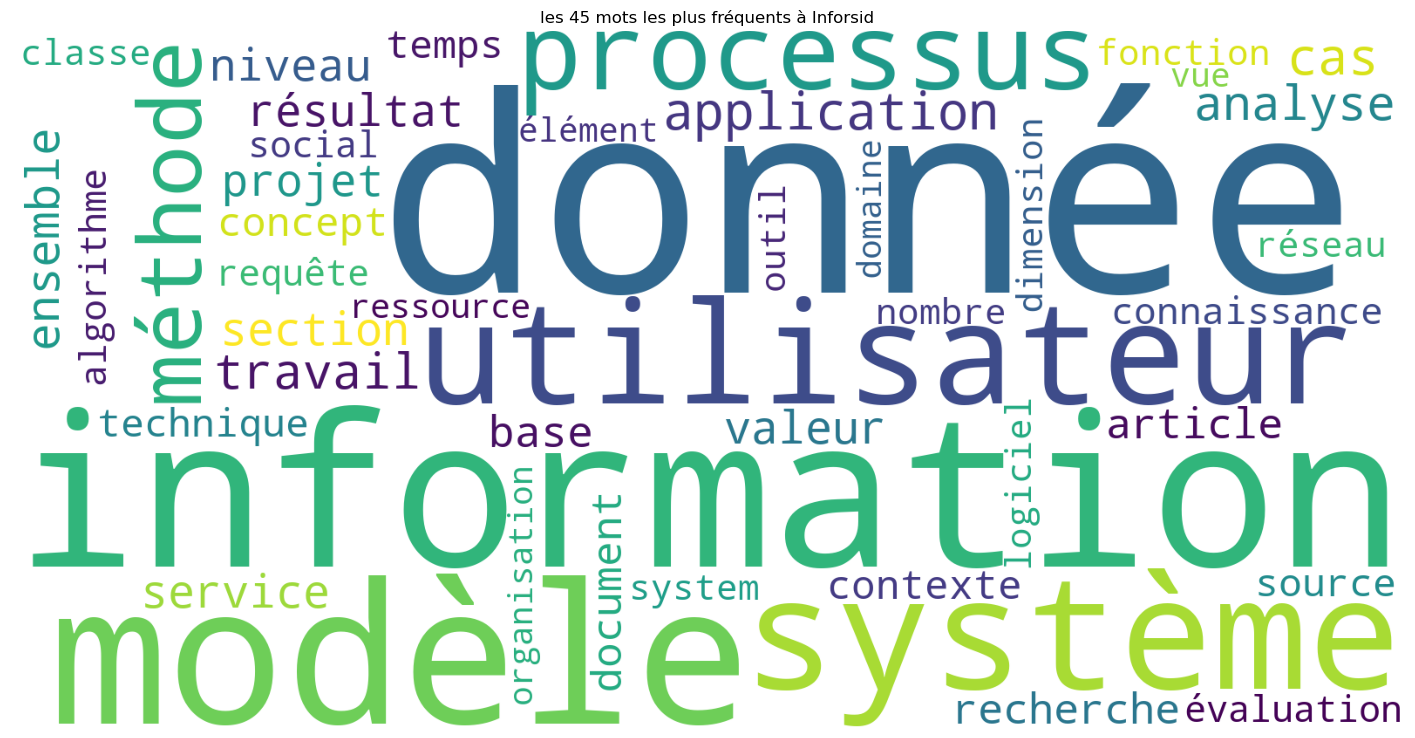

In [108]:
dico = inforsid_motsplusfreq.head(seuil_visu*3)['count'].to_dict()

create_wc (seuil_visu*3, dico, "mots les plus fréquents à Inforsid")

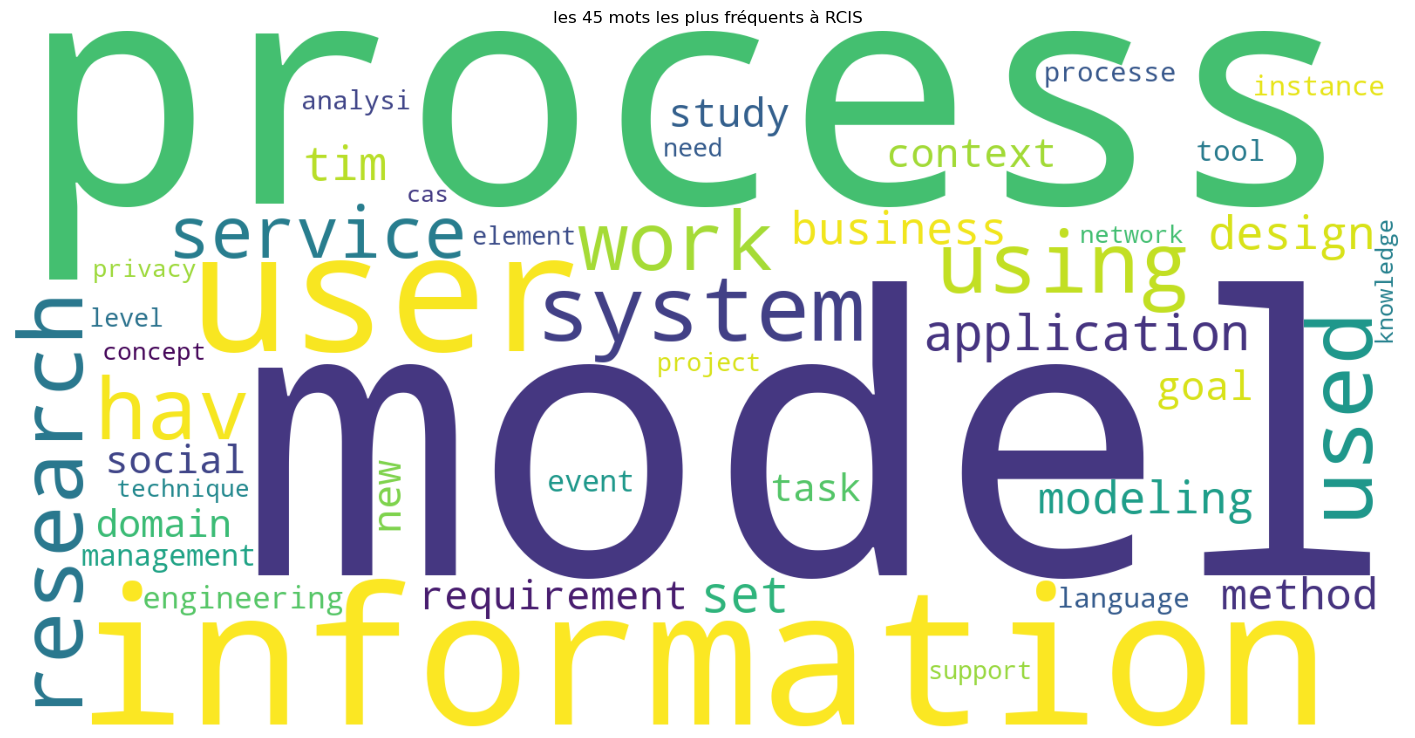

In [109]:
dico = rcis_motsplusfreq.head(seuil_visu*3)['count'].to_dict()

create_wc (seuil_visu*3, dico, "mots les plus fréquents à RCIS")

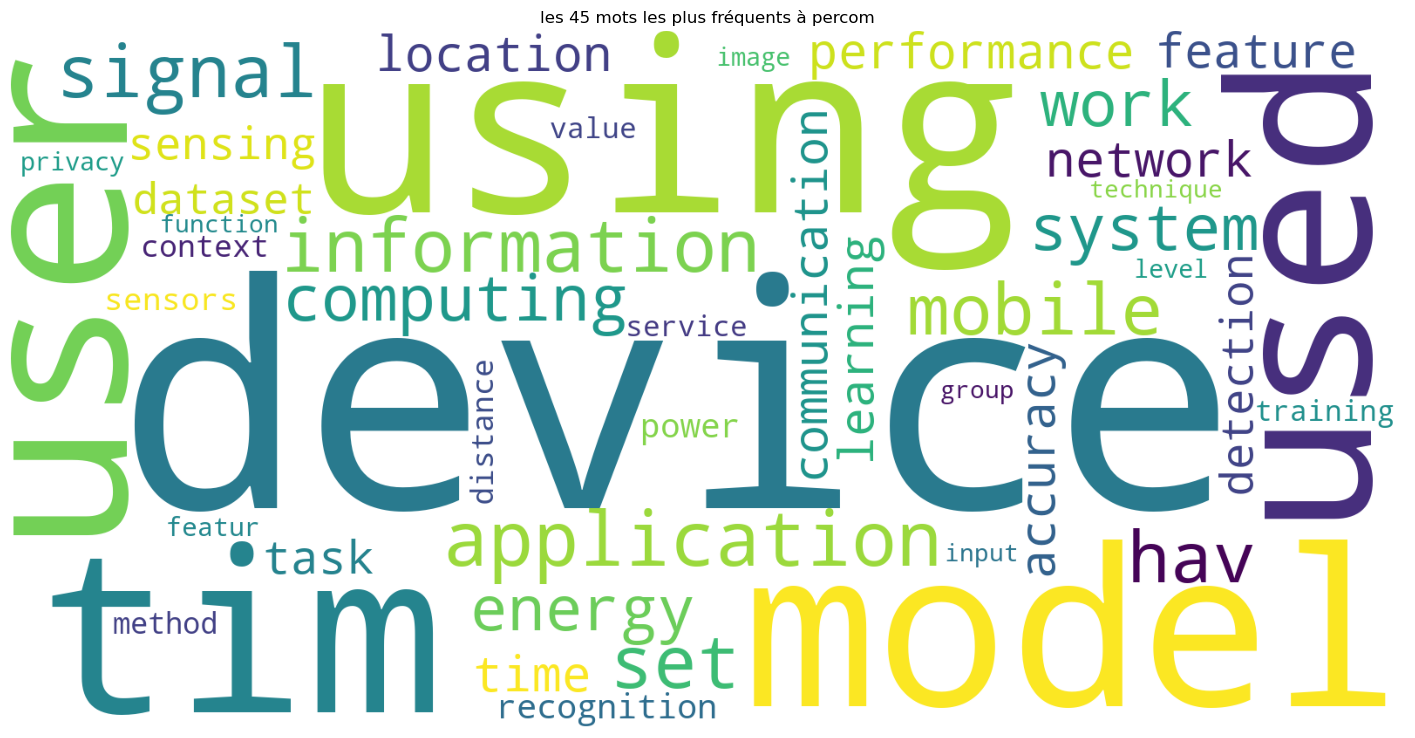

In [110]:
dico = percom_wordcount_motsplusfreq.head(seuil_visu*3)['count'].to_dict()

create_wc (seuil_visu*3, dico, "mots les plus fréquents à percom")

### wordcloud digrammes

nuage de mots des digrammes

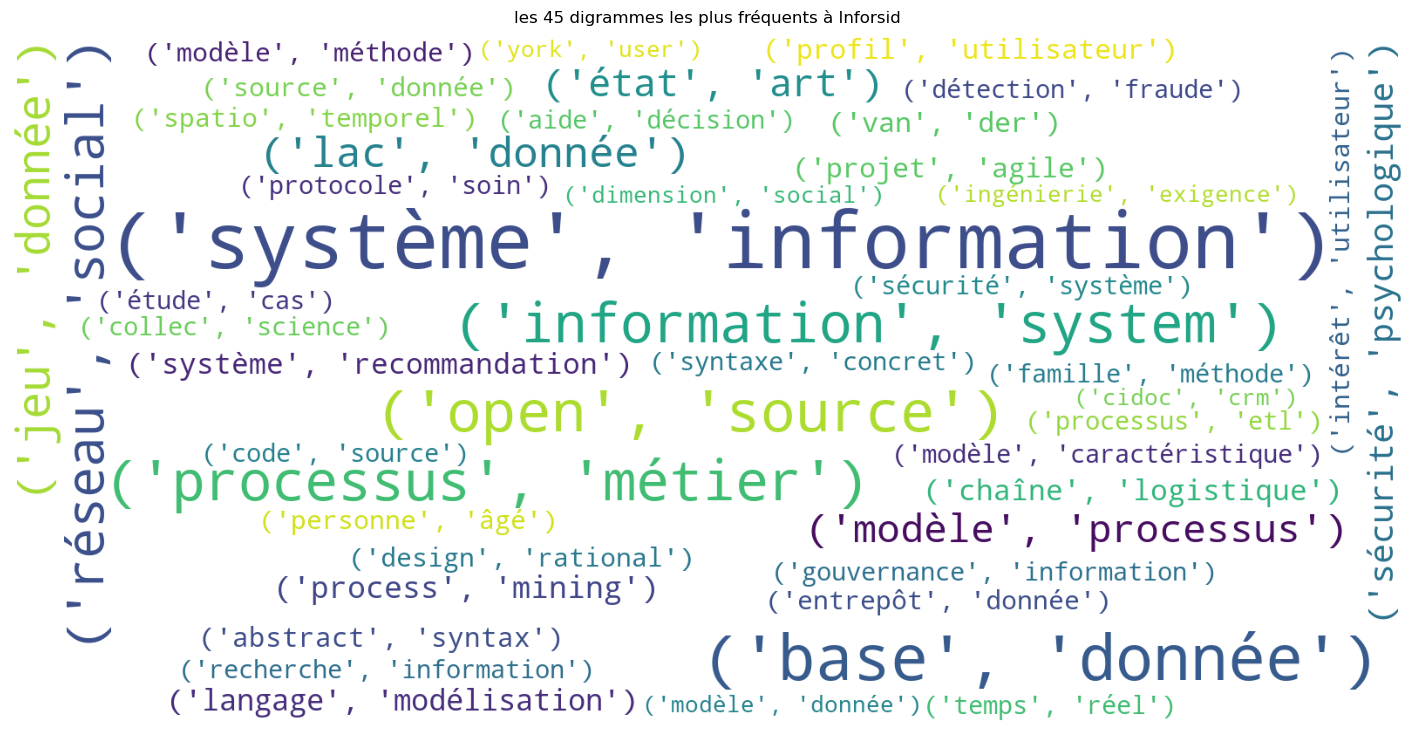

In [111]:
dico = inforsid_ngramplusfreq.head(seuil_visu*3)['count'].to_dict()
create_wc (seuil_visu*3, dico, "digrammes les plus fréquents à Inforsid")

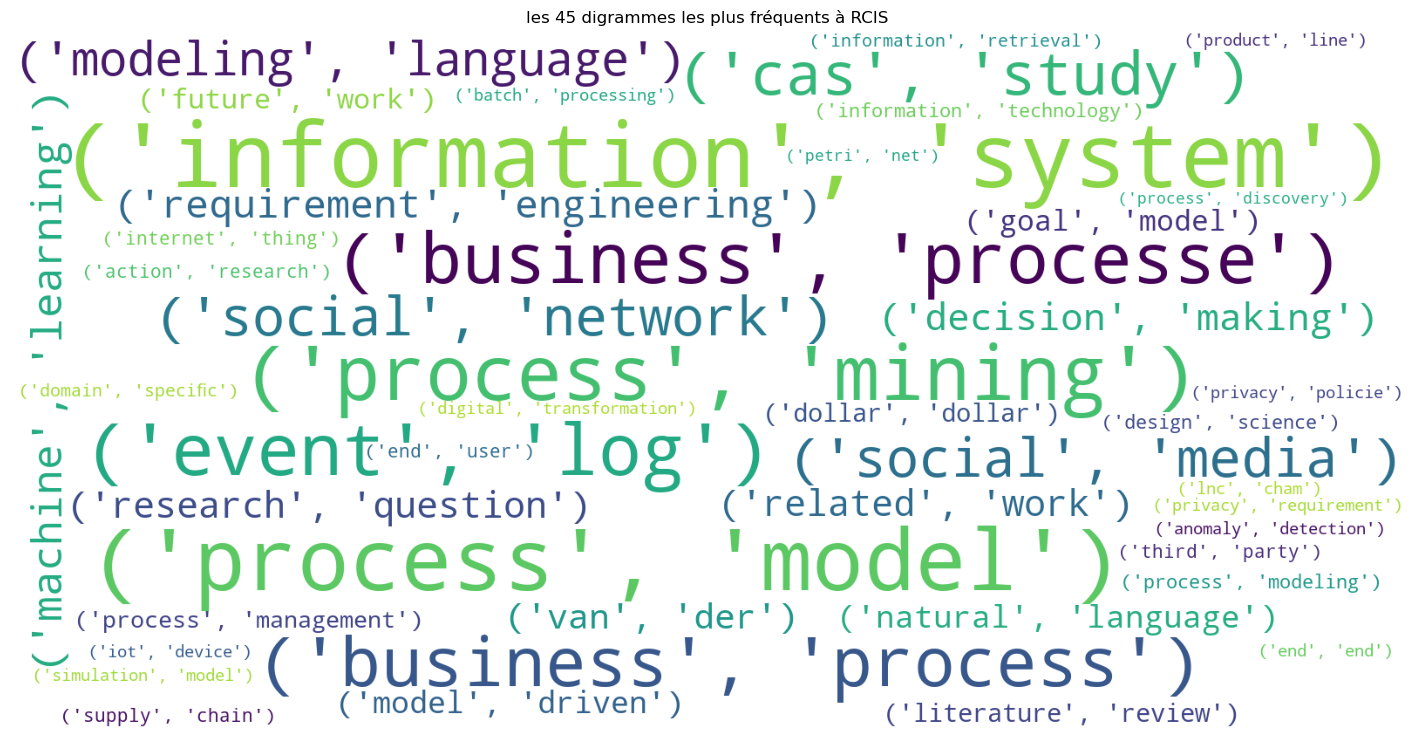

In [114]:
dico = rcis_ngramplusfreq.head(seuil_visu*3)['count'].to_dict()
create_wc (seuil_visu*3, dico, "digrammes les plus fréquents à RCIS")

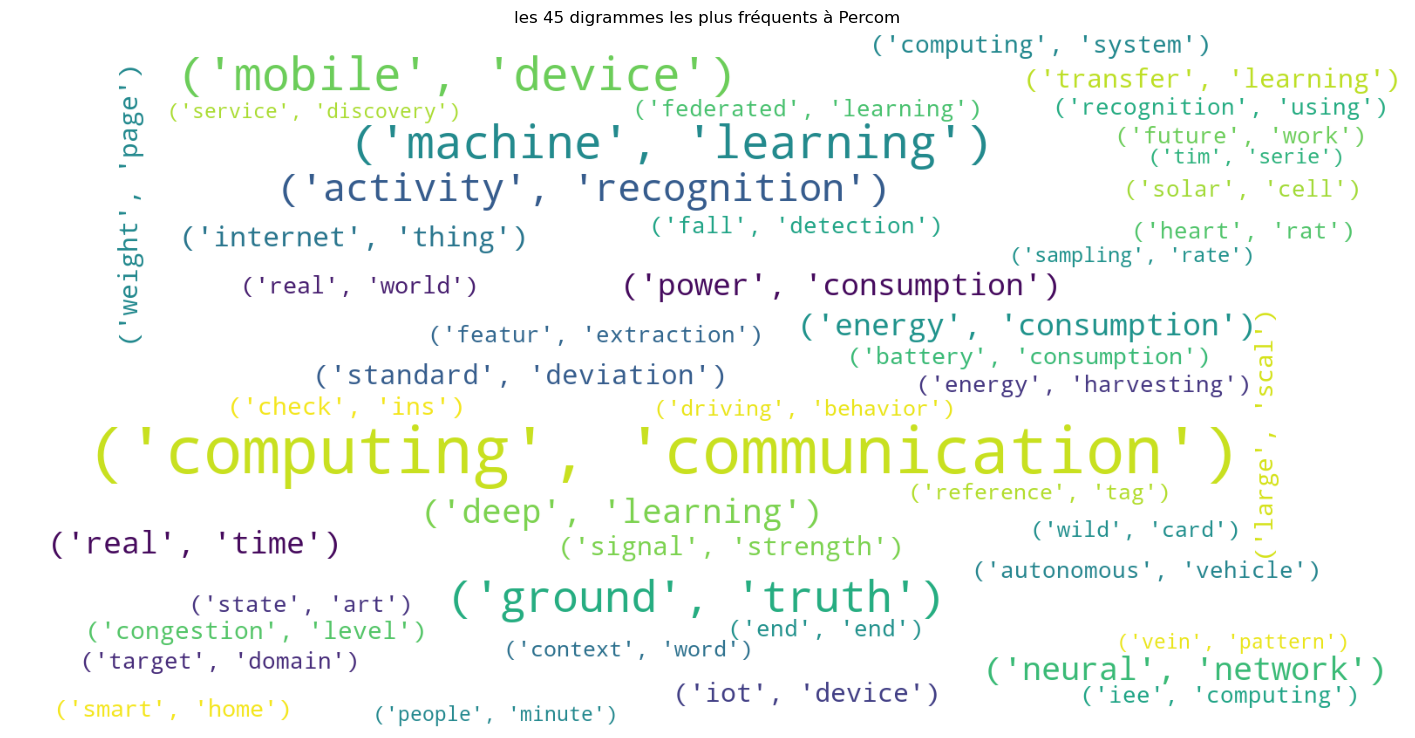

In [116]:
dico = percom_ngramplusfreq.head(seuil_visu*3)['count'].to_dict()
create_wc (seuil_visu*3, dico, "digrammes les plus fréquents à Percom")